# Mini Project 1
## Predicting Vehicle MPG

In [84]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Auto MPG Data Set
Data Set Characteristics: Multivariate

Attribute Characteristics: Categorical, Real

Number of Attributes: 9 including class attribute

Number of Instances: 398

Area: N/A

Date Donated: 1993-07-07

Associated Tasks: Regression

Missing Values?: Yes

## Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  REMOVED continuous
    7. model year:    multi-valued discrete
    8. origin:        REMOVED multi-valued discrete
    9. car name:      REMOVED (from csv)string (unique for each instance)

In [85]:
import pandas as pd

def load_mpg_data():
    csv_path = os.path.join('Data', 'auto-mpg.csv')
    return pd.read_csv(csv_path)

In [86]:
mpg = load_mpg_data()
# Removed values that show no correlation
del mpg['acceleration'] 
del mpg['origin']
del mpg['car_name']
mpg.head()
#data = np.loadtxt(os.path.join('Data', 'auto-mpg.csv'),
 #                 delimiter=',',usecols=[0,1,2,3,4,5,6,7],
 #                skiprows=1)
#names = ['cylinders', 'displacement','horsepower','weight','model year']
#print(data)
# Remove columns 7 and 5, for origin and acceleration values
#data = np.delete(data, 7, 1)
#data = np.delete(data, 5, 1)

# Split data into X for attribues and y for label
#X,y = data[:, 1:], data[:,0]
#print(X)
#print(y)
#m = y.size

,mpg,cylinders,displacement,horsepower,weight,model_year
0,18.0,8,307.0,130,3504,70
1,15.0,8,350.0,165,3693,70
2,18.0,8,318.0,150,3436,70
3,16.0,8,304.0,150,3433,70
4,17.0,8,302.0,140,3449,70


In [87]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   model_year    392 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 18.5 KB


In [88]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,82.000000


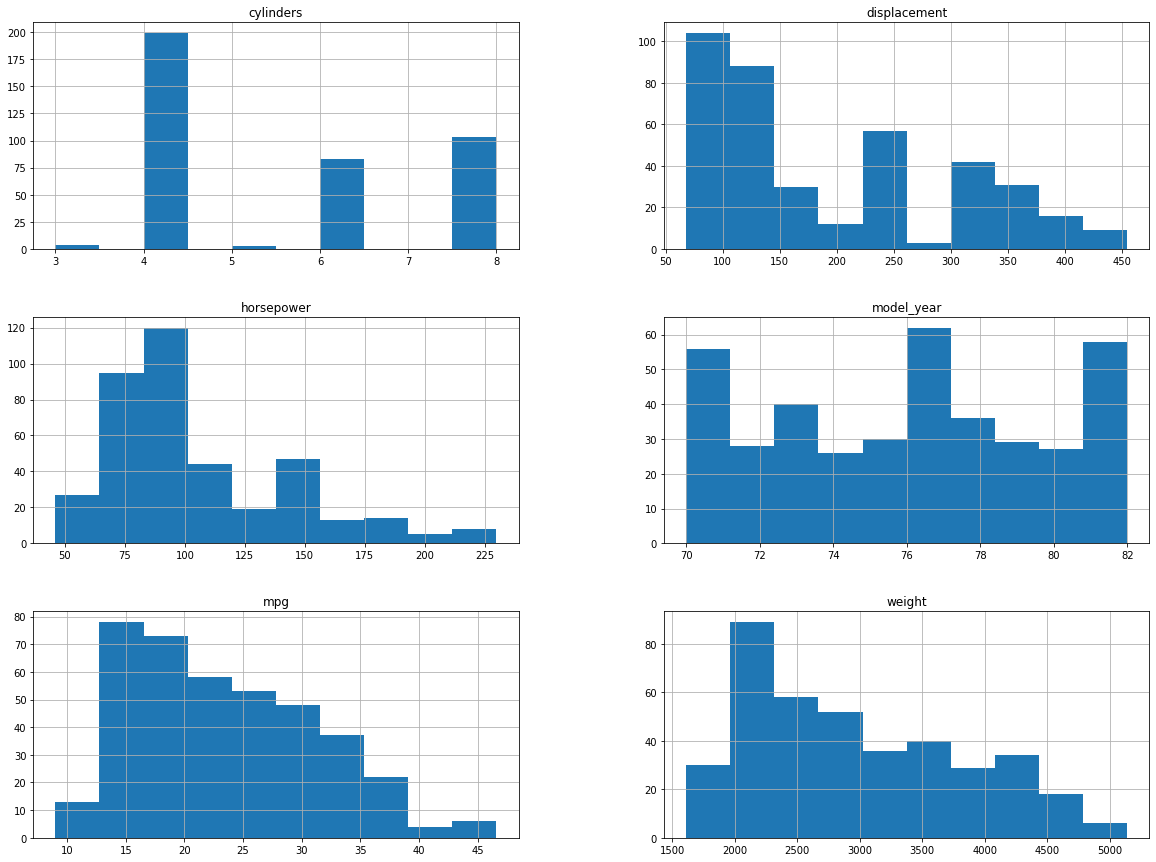

In [89]:
mpg.hist(figsize=(20,15))
plt.show()

In [90]:
#def split_train_test(data, test_ratio):
#    shuffled_indices = np.random.permutation(len(data))
#   test_set_size = int(len(data) * test_ratio)
#    test_indices = shuffled_indices[:test_set_size]
#    train_indices = shuffled_indices[test_set_size:]
#    return data.iloc[train_indices], data.iloc[test_indices]

In [91]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(mpg, test_size=0.2, random_state=42)
print(len(train_set), "train + ", len(test_set), "test")

313 train +  79 test


In [92]:
# Plot every attribute against every other attribute
# THIS WILL MAKE A LOT OF GRAPHS
from pandas.plotting import scatter_matrix
attributes = ['mpg','cylinders', 'displacement','horsepower','weight','model_year']
#scatter_matrix(mpg[attributes], figsize=(12,8))

In [93]:
# Remove labels from training set and put them in their own array 
mpg_training_X = train_set.drop("mpg",axis=1)
mpg_training_Y = train_set['mpg'].copy()
#print(mpg_X)
#print(mpg_Y)

In [94]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [95]:
# Feature Scaling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])
mpg_training_X_prepared = num_pipeline.fit_transform(mpg_training_X)
#print(mpg_X_prepared)

In [96]:
# Build the linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(mpg_training_X_prepared, mpg_training_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
# Show some predicted data
some_data = mpg_training_X.iloc[:5]
some_labels = mpg_training_Y.iloc[:5]
some_data_prepared = num_pipeline.fit_transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [21.00545087 26.68411912 22.6747277  11.39894494 36.23356248]
Labels: [18.6, 25.0, 18.0, 15.0, 39.0]


In [100]:
# Compute the root mean squared error
from sklearn.metrics import mean_squared_error
mpg_predictions = lin_reg.predict(mpg_X_prepared)
lin_mse = mean_squared_error(mpg_Y, mpg_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

3.457543879636676
